<a href="https://colab.research.google.com/github/LukeBarboza/AI-Codes/blob/Decision_tree_classification/Arvore_de_decisao_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)



In [ ]:
#!pip install pydotplus
!pip install -q dtreeviz

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

from google.colab import files
uploaded = files.upload()


Saving sonar.csv to sonar (1).csv


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [ ]:
file_name = list(uploaded.keys())[0]
print("Filename: " + file_name)
sonar = pd.read_csv(file_name, sep=';')  # Especificando o separador como ponto e vírgula

# Substitui vírgulas por pontos e converte para float nas colunas numéricas
for col in sonar.columns[:-1]:  # Exclui a coluna de 'Classe' (última coluna)
    sonar[col] = sonar[col].str.replace(',', '.').astype(float)

# Exibe as dimensões dos dados
print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys()))
print(sonar.describe(), sep='\n')

# Define X (atributos) e y (rótulos/target)
X = sonar.iloc[:, 0:(sonar.shape[1] - 1)]  # Seleciona todas as colunas, exceto a última

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:, (sonar.shape[1] - 1)])  # Codifica a última coluna para rótulos

# Particiona a base de dados em treino e teste (90% treino, 10% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

# Treina o modelo de árvore de decisão
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree = sonar_tree.fit(X_train, y_train)

# Acurácia na base de treinamento
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

# Predições e avaliação
y_pred = sonar_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

# Matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)

Filename: sonar (1).csv

Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', '

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [ ]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)



Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.7142857142857143
              precision    recall  f1-score   support

        Mina       0.60      0.75      0.67         8
       Rocha       0.82      0.69      0.75        13

    accuracy                           0.71        21
   macro avg       0.71      0.72      0.71        21
weighted avg       0.74      0.71      0.72        21

       Mina (prev)  Rocha (prev)
Mina             6             2
Rocha            4             9


### Exibição da árvore de decisão

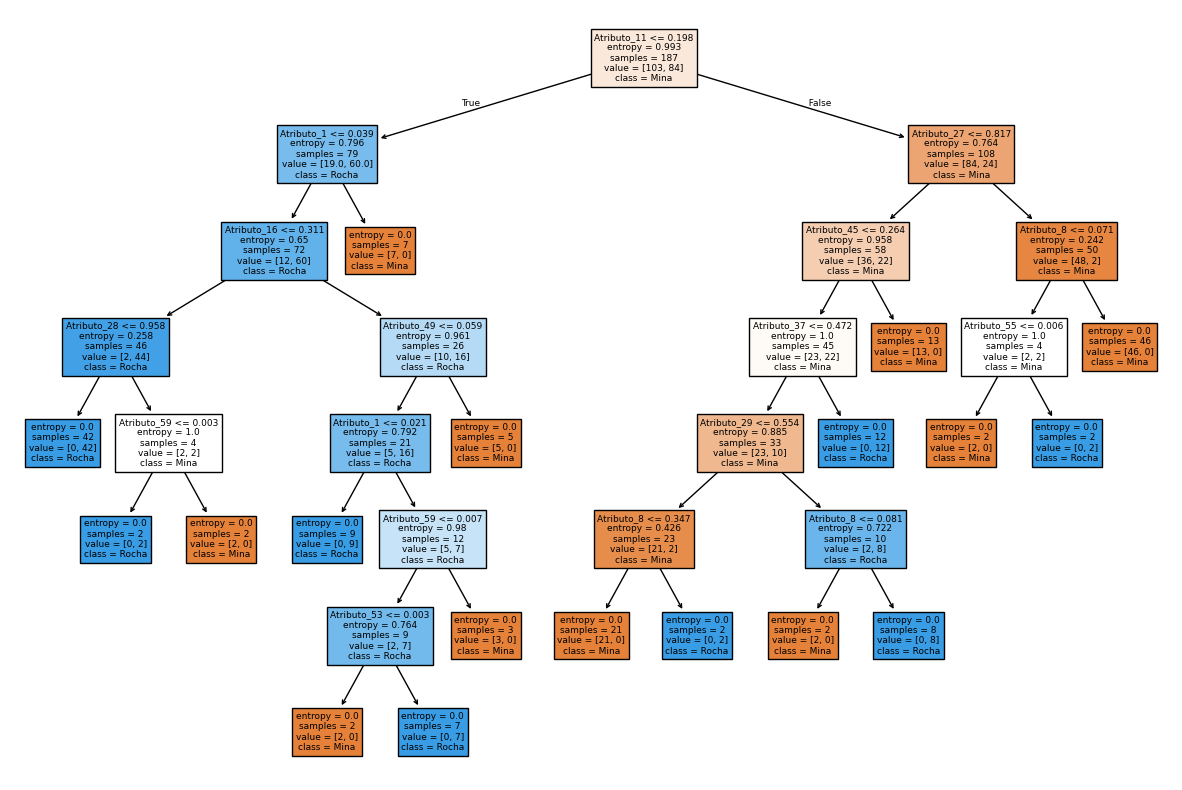

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(sonar_tree, feature_names=X.columns, class_names=["Mina", "Rocha"], filled=True)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Exporta a árvore para um formato DOT
dot_data = export_graphviz(sonar_tree,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=["Mina", "Rocha"],
                           filled=True, rounded=True,
                           special_characters=True)

# Cria o gráfico
graph = graphviz.Source(dot_data)
graph.render("sonar_tree", view=True)  # Salva e abre automaticamente


'sonar_tree.pdf'

In [ ]:
from google.colab import files

# Move the file to the appropriate location if needed
graph.render("sonar_tree", view=True)

# Download the file
files.download("sonar_tree.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>